In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [5]:
def label_encode(df, col_name):
    label_encoder = LabelEncoder()
    label_encoder.fit(df[col_name])
    df[col_name] = label_encoder.transform(df[col_name])

In [6]:
def normaliser(df, col_name):
    col_2D = np.array(df[col_name]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(col_2D)
    df[col_name] = scaler.transform(col_2D)

In [7]:
weather_data = pd.read_csv('weatherAUS.csv')
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
print(f"The data has {weather_data.shape[0]} rows")
print(f"The data has {weather_data.shape[1]} columns")

The data has 145460 rows
The data has 23 columns


### Checking for null values 

In [9]:
weather_data.isna().sum().sort_values(ascending= False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [10]:
null_cols = weather_data.columns[weather_data.isna().any()].tolist()
print(f"Null columnns are {null_cols}")

Null columnns are ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


###  Amount of null rows in comparision to the total number of rows

In [11]:
a = ((weather_data.isna().sum())/len(weather_data)).sort_values(ascending= False)
a

Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindDir9am       0.072639
WindGustDir      0.070989
WindGustSpeed    0.070555
Humidity3pm      0.030984
WindDir3pm       0.029066
Temp3pm          0.024811
RainTomorrow     0.022460
Rainfall         0.022419
RainToday        0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
Temp9am          0.012148
WindSpeed9am     0.012148
MinTemp          0.010209
MaxTemp          0.008669
Location         0.000000
Date             0.000000
dtype: float64

In [12]:
cols_to_remove = []
for i in range(len(null_cols)):
    if a[i] > 0.10:
        cols_to_remove.append(a.index[i])

In [13]:
cols_to_remove

['Sunshine',
 'Evaporation',
 'Cloud3pm',
 'Cloud9am',
 'Pressure9am',
 'Pressure3pm']

In [14]:
weather_data.drop(cols_to_remove, axis= 1, inplace= True)

In [15]:
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No


In [16]:
weather_data.isna().sum().sort_values(ascending= False)

WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
WindSpeed9am      1767
Temp9am           1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

In [17]:
weather_data.dropna(inplace= True)

In [18]:
weather_data.drop('Date', axis= 1, inplace= True)

In [19]:
weather_data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No


In [20]:
print(f"The data has {weather_data.shape[0]} rows")
print(f"The data has {weather_data.shape[1]} columns")

The data has 121790 rows
The data has 16 columns


In [21]:
weather_data.isna().sum().sort_values(ascending= False)

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [22]:
categorical_cols, numeric_cols = [], []
for col in weather_data.columns:
    if weather_data[col].dtypes == 'O':
        categorical_cols.append(col)
    else:
        numeric_cols.append(col)

In [23]:
categorical_cols

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [24]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Temp9am',
 'Temp3pm']

In [25]:
unique_vals, unique_counts = [], []
for col in categorical_cols:
    unique_vals.append(np.unique(weather_data[col]))
    unique_counts.append(len(np.unique(weather_data[col])))
    
categorical_analysis = pd.DataFrame({'Columns' : categorical_cols, 
                                    'Categories' : unique_vals, 
                                    'Counts' : unique_counts})

In [26]:
categorical_analysis

,Columns,Categories,Counts
0,Location,"[Adelaide, Albury, AliceSprings, BadgerysCreek...",47
1,WindGustDir,"[E, ENE, ESE, N, NE, NNE, NNW, NW, S, SE, SSE,...",16
2,WindDir9am,"[E, ENE, ESE, N, NE, NNE, NNW, NW, S, SE, SSE,...",16
3,WindDir3pm,"[E, ENE, ESE, N, NE, NNE, NNW, NW, S, SE, SSE,...",16
4,RainToday,"[No, Yes]",2
5,RainTomorrow,"[No, Yes]",2


## Splitting the data into X and y

In [27]:
X = weather_data.drop('RainTomorrow', axis= 1)
y = weather_data['RainTomorrow']

In [28]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No


## Splitting the data into train and test set (80:20) 

In [29]:
np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday
136466,AliceSprings,24.7,40.3,0.0,SSE,37.0,N,SE,9.0,15.0,33.0,17.0,33.2,39.2,No
105997,Woomera,14.0,30.7,0.0,E,37.0,SE,ENE,20.0,13.0,42.0,26.0,17.9,28.9,No
91720,GoldCoast,19.7,27.4,0.0,SE,56.0,SE,SE,44.0,39.0,68.0,53.0,22.4,25.1,No
34407,SydneyAirport,11.7,17.0,0.0,W,76.0,WNW,WSW,57.0,39.0,43.0,31.0,14.5,16.1,No
77234,Portland,3.5,10.9,2.4,SW,20.0,W,S,6.0,7.0,94.0,86.0,8.3,10.3,Yes


In [30]:
X_train.shape, X_test.shape

((97432, 15), (24358, 15))

In [31]:
len(y_train), len(y_test)

(97432, 24358)

## Making sure that the train set has all the different categories as in the original set 

In [32]:
categorical_cols, numeric_cols = [], []
for col in X_train.columns:
    if X_train[col].dtypes == 'O':
        categorical_cols.append(col)
    else:
        numeric_cols.append(col)

In [33]:
unique_vals, unique_counts = [], []
for col in categorical_cols:
    unique_vals.append(np.unique(X_train[col]))
    unique_counts.append(len(np.unique(X_train[col])))
    
categorical_analysis = pd.DataFrame({'Columns' : categorical_cols, 
                                    'Categories' : unique_vals, 
                                    'Counts' : unique_counts})

In [34]:
categorical_analysis

,Columns,Categories,Counts
0,Location,"[Adelaide, Albury, AliceSprings, BadgerysCreek...",47
1,WindGustDir,"[E, ENE, ESE, N, NE, NNE, NNW, NW, S, SE, SSE,...",16
2,WindDir9am,"[E, ENE, ESE, N, NE, NNE, NNW, NW, S, SE, SSE,...",16
3,WindDir3pm,"[E, ENE, ESE, N, NE, NNE, NNW, NW, S, SE, SSE,...",16
4,RainToday,"[No, Yes]",2


## Label encoding the features for now 

In [35]:
for col in categorical_cols:
    label_encode(X_train, col)
    label_encode(X_test, col)

for col in X_train.columns:
    normaliser(X_train, col)
    normaliser(X_test, col)

In [36]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday
136466,0.043478,0.783019,0.852552,0.000000,0.666667,0.234375,0.200000,0.600000,0.082353,0.152941,0.33,0.17,0.866953,0.864341,0.0
105997,1.000000,0.530660,0.671078,0.000000,0.000000,0.234375,0.600000,0.066667,0.211765,0.129412,0.42,0.26,0.538627,0.664729,0.0
91720,0.282609,0.665094,0.608696,0.000000,0.600000,0.382812,0.600000,0.600000,0.494118,0.435294,0.68,0.53,0.635193,0.591085,0.0
34407,0.782609,0.476415,0.412098,0.000000,0.866667,0.539062,0.933333,1.000000,0.647059,0.435294,0.43,0.31,0.465665,0.416667,0.0
77234,0.673913,0.283019,0.296786,0.008935,0.800000,0.101562,0.866667,0.533333,0.047059,0.058824,0.94,0.86,0.332618,0.304264,1.0


### Doing label encoding for y separately as the function is built for dataframes only

In [37]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)

In [38]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

In [39]:
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
y_test = label_encoder.transform(y_test)

In [40]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [41]:
train_data = X_train
train_data['Target'] = y_train
train_data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,Target
136466,0.043478,0.783019,0.852552,0.000000,0.666667,0.234375,0.200000,0.600000,0.082353,0.152941,0.33,0.17,0.866953,0.864341,0.0,0
105997,1.000000,0.530660,0.671078,0.000000,0.000000,0.234375,0.600000,0.066667,0.211765,0.129412,0.42,0.26,0.538627,0.664729,0.0,0
91720,0.282609,0.665094,0.608696,0.000000,0.600000,0.382812,0.600000,0.600000,0.494118,0.435294,0.68,0.53,0.635193,0.591085,0.0,0
34407,0.782609,0.476415,0.412098,0.000000,0.866667,0.539062,0.933333,1.000000,0.647059,0.435294,0.43,0.31,0.465665,0.416667,0.0,0
77234,0.673913,0.283019,0.296786,0.008935,0.800000,0.101562,0.866667,0.533333,0.047059,0.058824,0.94,0.86,0.332618,0.304264,1.0,1


# Feature Selection 

## Correlation heatmap 

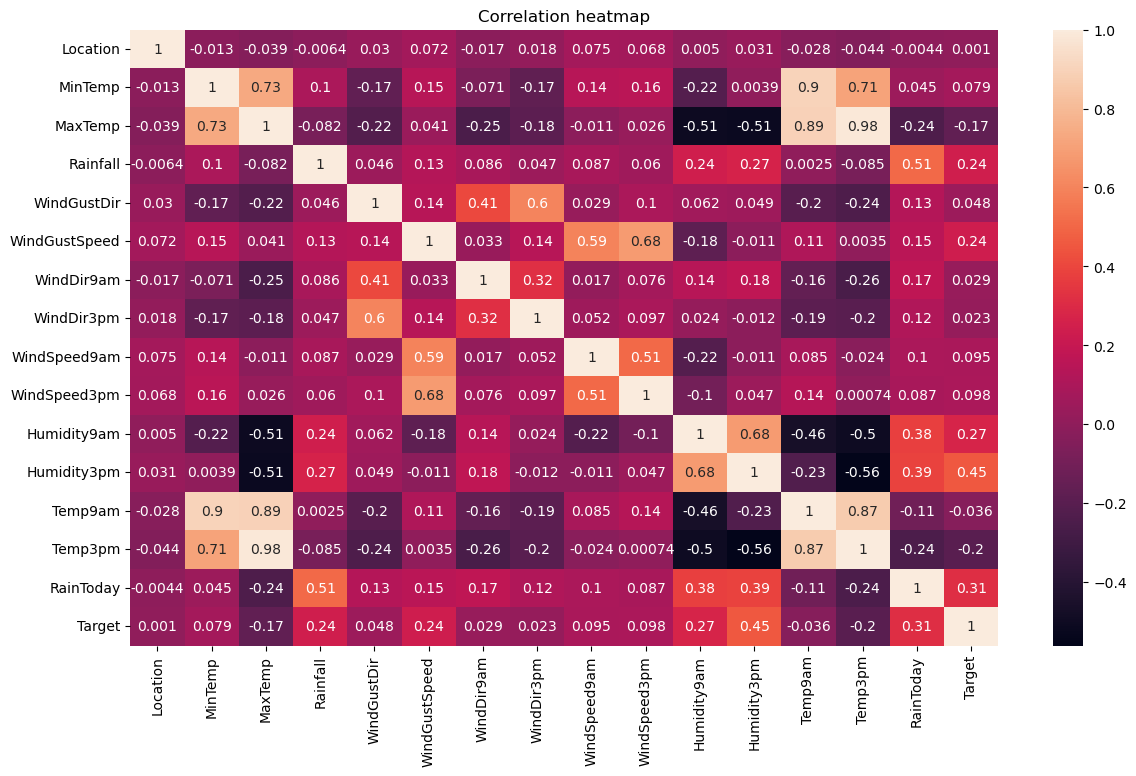

In [42]:
fig, ax = plt.subplots(figsize= (14,8))
ax.set_title('Correlation heatmap')
sns.heatmap(train_data.corr(), annot= True)
plt.show();

In [43]:
related = train_data.corr()['Target'].sort_values(ascending = False)
related

Target           1.000000
Humidity3pm      0.454846
RainToday        0.314283
Humidity9am      0.274073
Rainfall         0.240733
WindGustSpeed    0.236626
WindSpeed3pm     0.097957
WindSpeed9am     0.094683
MinTemp          0.079026
WindGustDir      0.047762
WindDir9am       0.029300
WindDir3pm       0.022950
Location         0.001042
Temp9am         -0.035594
MaxTemp         -0.166482
Temp3pm         -0.199886
Name: Target, dtype: float64

In [44]:
X_train = train_data[['WindGustSpeed', 'RainToday', 'Humidity3pm']]
X_train.head()

,WindGustSpeed,RainToday,Humidity3pm
136466,0.234375,0.0,0.17
105997,0.234375,0.0,0.26
91720,0.382812,0.0,0.53
34407,0.539062,0.0,0.31
77234,0.101562,1.0,0.86


In [45]:
X_test = X_test[['WindGustSpeed', 'RainToday', 'Humidity3pm']]
X_test.head()

,WindGustSpeed,RainToday,Humidity3pm
124279,0.243902,0.0,0.63
116736,0.317073,0.0,0.37
41964,0.382114,0.0,0.59
90983,0.317073,0.0,0.84
63435,0.317073,1.0,0.58


## Using Random Forest classifier  

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.8329912143854176

In [47]:
clf.score(X_train, y_train)

0.8540623203875524

### Confusion Matrix 

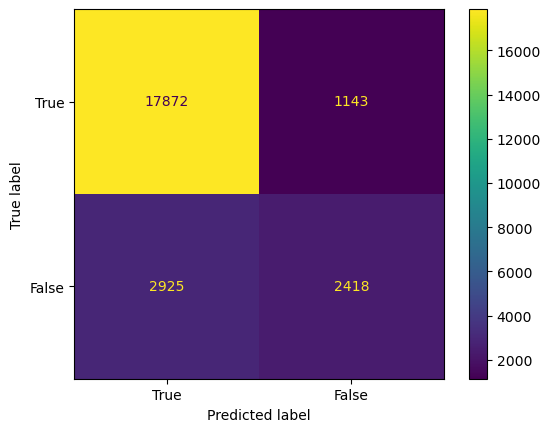

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm_matrix, display_labels= [True, False])
cm_display.plot();

## Applying KNN with different n 

In [49]:
from sklearn.neighbors import KNeighborsClassifier
score = []
for k in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors= k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score.append(clf.score(X_test, y_test))

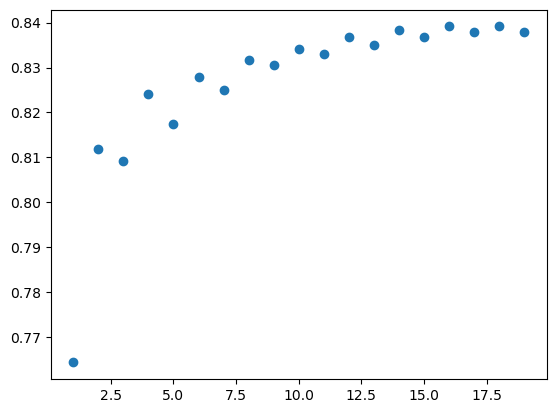

In [50]:
plt.scatter(x= [i for i in range(1, 20)], y= score);

In [51]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

0.8399293866491502

In [52]:
clf.score(X_train, y_train)

0.8405246736185237

In [53]:
train_data.to_csv('weather_train.csv', index= False)

## Using Decision Tree classifier 

In [54]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier(max_depth= 5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8392725182691518

In [55]:
clf.score(X_train, y_train)

0.8396830610066508

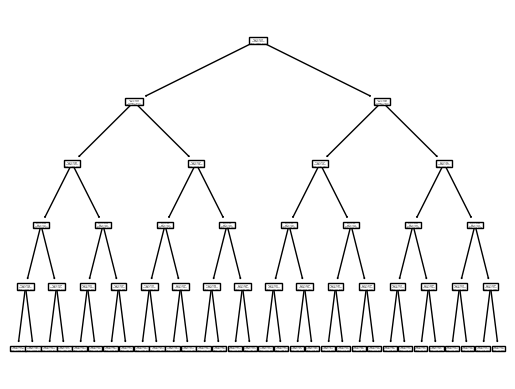

In [56]:
plot_tree(clf);

## Using Logistic Regression 

In [57]:
from sklearn.linear_model import LinearRegression
clf_l = LogisticRegression()
clf_l.fit(X_train, y_train)
clf_l.score(X_test, y_test)

0.8399293866491502

In [58]:
clf_l.score(X_train, y_train)

0.8405246736185237

## Using SVM

In [ ]:
from sklearn.svm import SVC,LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay

X = X_train
y = y_train

clf = SVC(C = 1, kernel = 'rbf')
clf.fit(X, y)    

In [ ]:
print('yi * alpha_i: \n', clf.dual_coef_)
print('Number of support vectors of each class:', clf.n_support_)

In [ ]:
clf.score(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

## Using XGBoosting Algorithm 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgboost_clf = GradientBoostingClassifier()
xgboost_clf.fit(X_train, y_train)

In [ ]:
xgboost_clf.score(X_test, y_test)